# Week 3 quiz/demo
Let's explore the Linear Ballistic Accumulator (LBA)! This notebook requires installing software (the [psireact](https://github.com/mortonne/psireact) library that implements the LBA in fancy hierarchical Bayesian terms). This installation happens in the first very coding line below and can take a minute or two depending on how quickly the jupyter server is running. Don't fret if it takes a little bit of time to finish the installation, and also expect that there will be a lot of text output from the installation. You can disregard it. Ok, make the install happen by running the line below!

In [1]:
!pip install psireact

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from psireact import lba

ModuleNotFoundError: No module named 'psireact'

First, don't worry about a Warning message above that references installing mkl. The notebook doesn't need this installed to work. 

The following two coding cells simply load in the LBA python library and set up some variables we will use for simulations. Be warned, loading in the LBA library can take some time (1-2 mins), so again don't fret if it takes awhile to finish.

In [3]:
lba_model = lba.LBA()
lba_func = lba_model.function_pdf()

In [4]:
n = 100  # number of times
m = 1    # number of choices
k = 2    # number of parameter values to test
t = np.tile(np.linspace(0, 10, n), m)
r = np.repeat(range(m), n).astype('int32')
demo = np.repeat(range(k), n * m)
df = pd.DataFrame({'rt': np.tile(t, k), 'response': np.tile(r, k),
                   'demo': demo, 'pdf': np.zeros(n * m * k)})

## Differences in drift rate
Remember from the Forstmann et al. paper that the LBA is defined by four central parameters (drift rate `v`, threshold `b`, starting point `A`, and non-decision time `tau`). We are going to look at three of them here.

Let's start by looking at differences in model predictions based on differences in drift rates. The drift rate parameter in the LBA is very similar to the drift rate in the random walk drift diffusion model. The assumption is that decisions are made through an evidence accumulation process. The rate of evidence accumulation depends on the drift rate. To visualize how drift rate (and other parameters) affect decision speed (i.e., response times or RTs), we can simulate the model to generate a probability distribution of RTs. This happens in the code below. First, parameter values for two different conditions are set. Note, that across the two parameter sets, only drift rate (`v0` vs. `v1`) differs. All the other parameters are held constant. The resulting RT distributions reveal the nature of RTs predicted by the model. Run the code to generate the prediction plot.

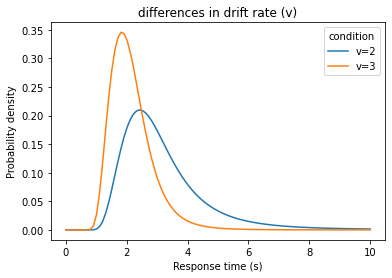

In [5]:
A = 5   # starting point range [0,A]
b = 10  # threshold
s = 1   # standard deviation of drift rate
tau = 0 # non-decision time
v0 = 2  # **slower drift rate
v1 = 3  # **faster drift rate

# simulation with first parameter set
df.loc[demo==0,'pdf'] = lba_func(t,r,A,b,[v0,v0],s,tau)
df.loc[demo==0,'condition'] = f'v={v0}'

# simulation with second parameter set
df.loc[demo==1,'pdf'] = lba_func(t,r,A,b,[v1,v1],s,tau)
df.loc[demo==1,'condition'] = f'v={v1}'

# plot predictions
g = sns.lineplot(data=df,x='rt',y='pdf',hue='condition')
g.set_title('differences in drift rate (v)')
g.set_xlabel('Response time (s)')
g.set_ylabel('Probability density');

What you should see in the plot above is that a higher drift rate (plotted in orange) leads to faster RTs (i.e., the bulk of the distribution is centred at about 2s). The slower drift rate (plotted in blue) leads to slower RTs. However, the RTs are not simply slower, they are spread out to longer RTs without a shift in the distribution. In other words, the slower drift rate model predictions show a distribution with a longer tail. The shape of the distribution has changed. What about the other parameters?

## Differences in threshold
Forstmann et al. actually found differences in threshold (`b`, the point at which evidence accumulation stops to make a decision) as a key factor in their experiment. Here we can see how threshold differences actually change the RT predictions. Note that only threshold is changing in the below code, all other parameters including drift rate are kept constant across the two simulations.

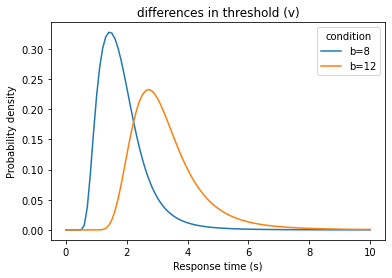

In [6]:
A = 5   # starting point range [0,A]
b0 = 8  # **lower threshold
b1 = 12 # **higher threshold
s = 1   # standard deviation of drift rate
tau = 0 # non-decision time
v = 2.5 # drift rate

# simulation with first parameter set
df.loc[demo==0,'pdf'] = lba_func(t,r,A,b0,[v,v],s,tau)
df.loc[demo==0,'condition'] = f'b={b0}'

# simulation with second parameter set
df.loc[demo==1,'pdf'] = lba_func(t,r,A,b1,[v,v],s,tau)
df.loc[demo==1,'condition'] = f'b={b1}'

# plot predictions
g = sns.lineplot(data=df,x='rt',y='pdf',hue='condition')
g.set_title('differences in threshold (v)')
g.set_xlabel('Response time (s)')
g.set_ylabel('Probability density');

This might look similar to what we saw above with changes in drift rate. The tail of the distribution for the higher threshold (orange) is certainly longer, but there is also a shift in the distribution on the left side. In other words, a higher threshold shifts all RTs to be a little bit longer. We didn't see this sort of shift with differences in drift rate.

## Differences in non-decision time
Non-decision time is all the processing time associated with a decision that isn't actually related to the decision making process itself. Imagine you make one response with your dominant hand and the other response with your non-dominant hand. You might expect that there would be a delay in making a response with your non-dominant hand simply because it is less practiced. This sort of difference doesn't have anything to do with evidence accumulation, but rather a delay due to motor execution. Non-decision time, `tau`, is the time needed for these non-decision processes. And, it has a specific effect on the RT predictions:

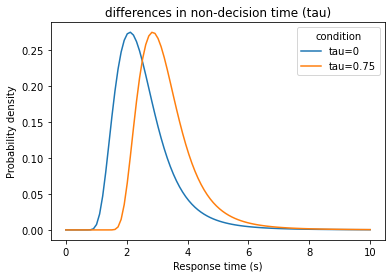

In [7]:
A = 5   # starting point range [0,A]
b = 10  # threshold
s = 1   # standard deviation of drift rate
tau0 = 0    # **shorter non-decision time
tau1 = 0.75 # **longer non-decision time
v = 2.5 # drift rate

# simulation with first parameter set
df.loc[demo==0,'pdf'] = lba_func(t,r,A,b,[v,v],s,tau0)
df.loc[demo==0,'condition'] = f'tau={tau0}'

# simulation with second parameter set
df.loc[demo==1,'pdf'] = lba_func(t,r,A,b,[v,v],s,tau1)
df.loc[demo==1,'condition'] = f'tau={tau1}'

# plot predictions
g = sns.lineplot(data=df,x='rt',y='pdf',hue='condition')
g.set_title('differences in non-decision time (tau)')
g.set_xlabel('Response time (s)')
g.set_ylabel('Probability density');

Differences in the non-decision time parameter lead to a very clean shift in RTs. Longer non-decision times perfectly shift the RTs to longer durations without changing anything about the shape of the distribution. 

## Explaning differences in real data
So, we can see from the above simulations that the LBA parameters have unique effects on the predicted RTs. By mapping specific differences in parameter changes to the RTs observed across experimental conditions, we can begin to understand how such experimental manipulations affect the decision making process. Let's look at some data from an experiment in which participants were deciding whether visual images contained an animal or not. In one condition, named "intact", the images were presented unmodified such that participants had all the visual information available to make rapid decisions. In another condition, named "noise", random visual noise was added to the image potentially slowing the visual system in making the correct categorization decision. The specific prediction is that visual noise will slow responses. But how that slowing actually occurs in the decision making process remains a mystery...unless we use a model!

First, load in the data from one participant and plot it:

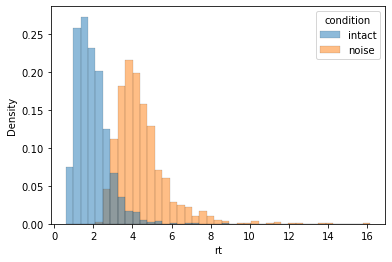

In [8]:
obs_data = pd.read_csv('obs_data.csv')
intact_data = obs_data.loc[obs_data.condition=='intact']
noise_data = obs_data.loc[obs_data.condition=='noise']
sns.histplot(obs_data,x='rt',hue='condition',stat='density',linewidth=0.1);

There's clearly an effect with slower responses in the noise condition relative to the intact condition. Let's figure out which LBA parameters are affected by the noise condition. To do so, we will need to do some manual model fitting. The code below includes two parameter sets, one for the intact condition and one for the noise condition. The code will simulate the model with the two parameter sets and plot the model predictions along with the observed data. I have also included calculation of a model fit measure called log likelihood. This is similar to RMSE in that it represents the overall difference between observed and model-predicted data and that lower values represent a better fit. The log likelihood values for each condition are included in the title of the plot. Try different parameter sets by updating the values for the b (`b0` and `b1`), tau (`tau0` and `tau1`) and v (`v0` and `v1`) variables in the code below until you find a good fit. A good fit will be evidenced by lower log likelihood values and by the model-predicted RT distributions overlapping with the observed RT histograms in the plot. One hint is that two parameters need to be different between the conditions. And, log likelihood will never reach 0, values around 1700-2100 are expected.

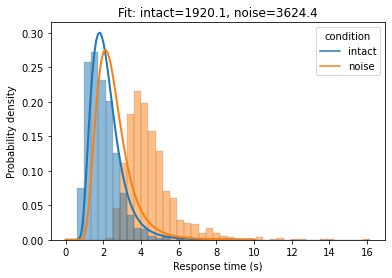

In [9]:
## Change the parameter values below to match the observed data

# intact parameters (Change these!)
b0 = 9   # threshold    
tau0 = 0  # non-decision time
v0 = 2.5  # drift rate  

# noise parameters (Change these!)
b1 = 10    # threshold
tau1 = 0   # non-decision time
v1 = 2.5   # drift rate

# Don't change these!
A = 5    # starting point range [0,A]
s = 1    # standard deviation of drift rate

# simulation with intact parameter set
df.loc[demo==0,'pdf'] = lba_func(t,r,A,b0,[v0,v0],s,tau0)
df.loc[demo==0,'condition'] = 'intact'
llk_intact = -np.sum(np.log(lba_func(intact_data.rt,intact_data.response,A,b0,[v0,v0],s,tau0)+10e-10))

# simulation with noise parameter set
df.loc[demo==1,'pdf'] = lba_func(t,r,A,b1,[v1,v1],s,tau1)
df.loc[demo==1,'condition'] = 'noise'
llk_noise = -np.sum(np.log(lba_func(noise_data.rt,noise_data.response,A,b1,[v1,v1],s,tau1)+10e-10))

# plot model predictions and observed data
sns.histplot(obs_data,x='rt',hue='condition',stat='density',linewidth=0.1);
g = sns.lineplot(data=df,x='rt',y='pdf',hue='condition',linewidth=2)
g.set_title('Fit: intact=%.1f, noise=%.1f'%(llk_intact,llk_noise))
g.set_xlabel('Response time (s)')
g.set_ylabel('Probability density');

Once you've found the best fitting parameters, enter them into the Quercus quiz!